Populating the interactive namespace from numpy and matplotlib



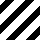
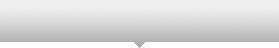
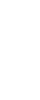
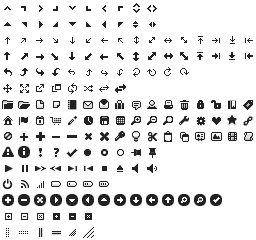
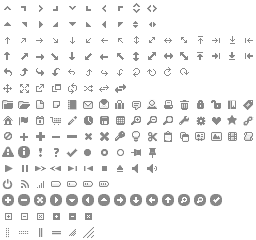
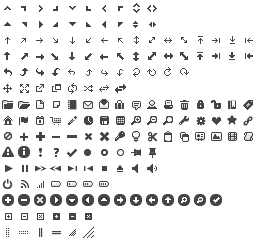
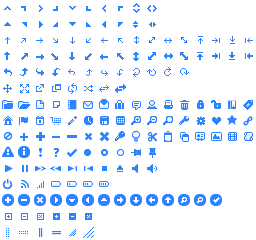
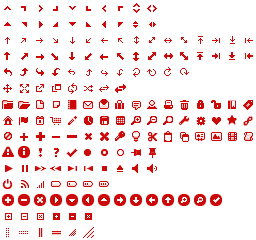
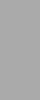
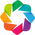
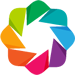
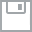
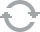
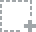
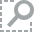
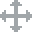
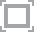
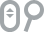

In [1]:
%pylab inline
import mxnet as mx

Testing the linear regression tutorial from the mxnet website.

In [2]:
#Training data
t_data = np.random.uniform(0,1,[100,2])
t_label = t_data[:,0] + 2*t_data[:,1]
batch_size = 1

In [3]:
#Evaluation data
e_data = np.array([[7,2],[6,10],[12,2]])
e_label = np.array([11,26,16])

In [4]:
train_iter = mx.io.NDArrayIter(t_data,t_label, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(e_data, e_label, batch_size, shuffle=False)

In [5]:
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')
fully_connected_layer  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fully_connected_layer, label=Y, name="lro")

In [6]:
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label']# network structure
)

In [7]:
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=1000,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))

In [8]:
model.predict(eval_iter).asnumpy()

array([[ 10.99997902],
       [ 25.9999218 ],
       [ 15.99997044]], dtype=float32)

In [9]:
metric = mx.metric.MSE()
model.score(eval_iter, metric)

[('mse', 2.4765540729276836e-09)]

In [10]:
eval_data = np.array([[7,2],[6,10],[12,2]])
eval_label = np.array([11.1,26.1,16.1]) #Adding 0.1 to each of the values
eval_iter = mx.io.NDArrayIter(eval_data, eval_label, batch_size, shuffle=False)
model.score(eval_iter, metric)

[('mse', 0.010008661697308222)]

Testing against $y = sin(x) - sin(2x)$.

In [11]:
#Training data
t_data = np.random.uniform(0,2*np.pi,100)
t_label = np.sin(t_data) - np.sin(2*t_data)
batch_size = 1
#Evaluation data
e_data = np.array([1,2,3])
e_label = np.sin([1,2,3]) - np.sin([2,4,6])
#
train_iter = mx.io.NDArrayIter(t_data,t_label, batch_size, shuffle=True,label_name='lin_reg_label')
eval_iter = mx.io.NDArrayIter(e_data, e_label, batch_size, shuffle=False)
#
X = mx.sym.Variable('data')
Y = mx.symbol.Variable('lin_reg_label')

In [12]:
x = np.linspace(0,2*np.pi,51)
y = np.sin(x) - np.sin(2*x)

Sigmoid, num hidden = 1


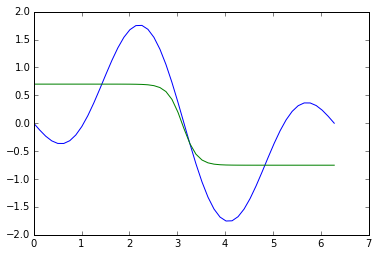

Sigmoid, num hidden = 2


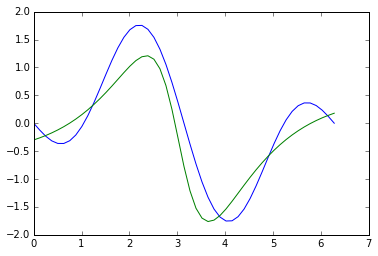

Sigmoid, num hidden = 3


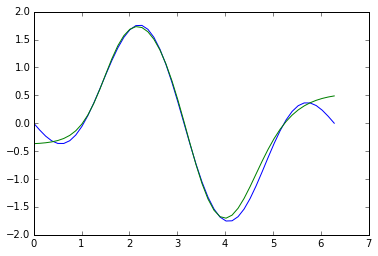

Sigmoid, num hidden = 4


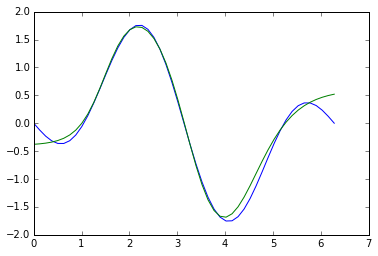

Sigmoid, num hidden = 5


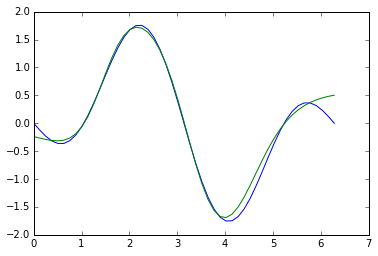

Sigmoid, num hidden = 6


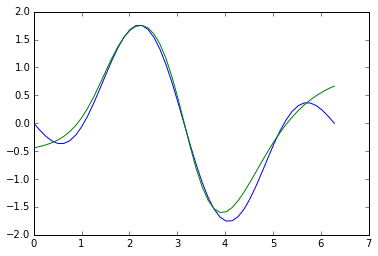

Sigmoid, num hidden = 7


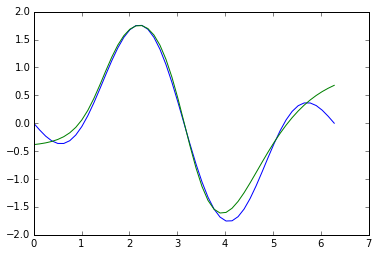

Sigmoid, num hidden = 8


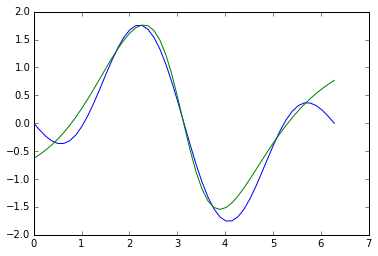

Sigmoid, num hidden = 9


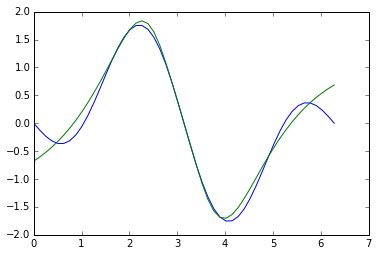

Sigmoid, num hidden = 10


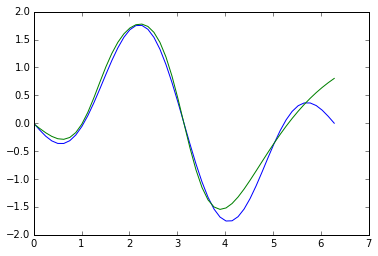

Sigmoid, num hidden = 11


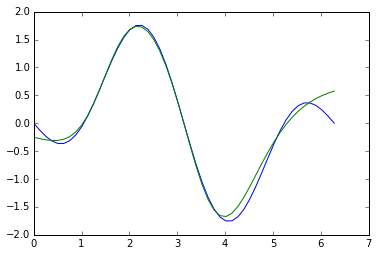

Sigmoid, num hidden = 12


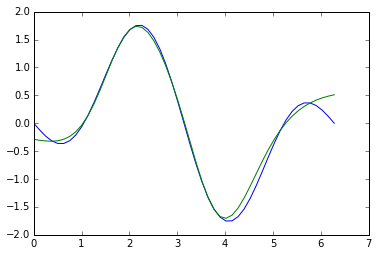

Sigmoid, num hidden = 13


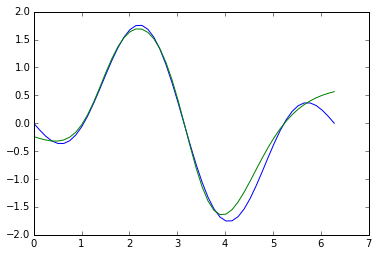

Sigmoid, num hidden = 14


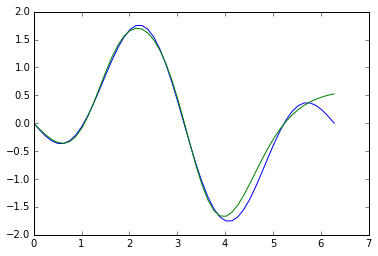

Sigmoid, num hidden = 15


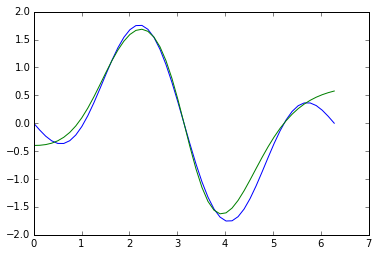

In [13]:
for i in range(1,16):
    #Requires use of an activation layer in order to avoid just being a straight line
    fc1  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = i)
    act = mx.sym.Activation(data = fc1, act_type = 'sigmoid')
    #Final layer must have num_hidden = shape of labels
    fc2  = mx.sym.FullyConnected(data=act, name='fc2', num_hidden = 1)
    lro = mx.sym.LinearRegressionOutput(data=fc2, label=Y, name="lro")
    #
    model = mx.mod.Module(
        symbol = lro ,
        data_names=['data'],
        label_names = ['lin_reg_label'])
    #
    model.fit(train_iter, eval_iter,
                optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
                num_epoch=1000,
                batch_end_callback = mx.callback.Speedometer(batch_size, 2))
    print('Sigmoid, num hidden = {}'.format(i))
    plt.plot(x,y)
    plt.plot(x,model.predict(mx.io.NDArrayIter(x)).asnumpy())
    plt.show()

Sigmoid, num hidden = 5, num_epoch = 1000


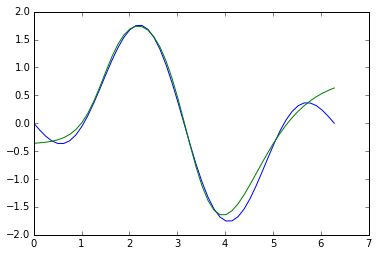

Sigmoid, num hidden = 5, num_epoch = 2000


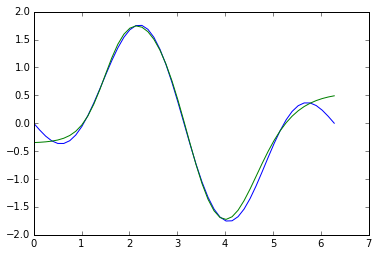

Sigmoid, num hidden = 5, num_epoch = 3000


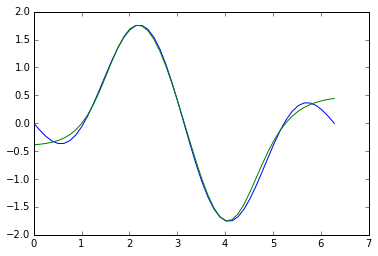

Sigmoid, num hidden = 5, num_epoch = 4000


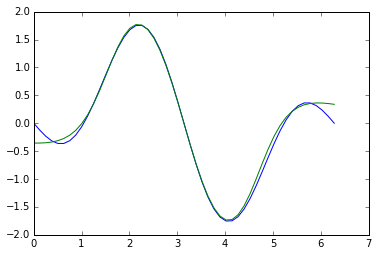

Sigmoid, num hidden = 5, num_epoch = 5000


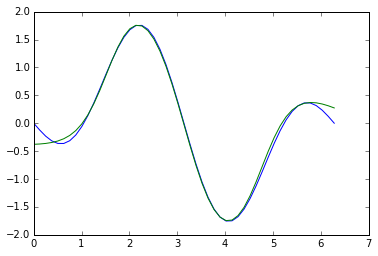

Sigmoid, num hidden = 5, num_epoch = 6000


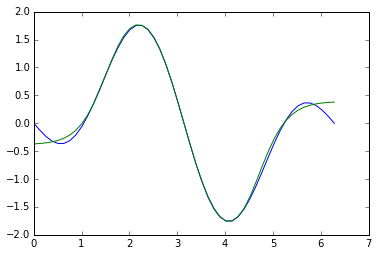

Sigmoid, num hidden = 5, num_epoch = 7000


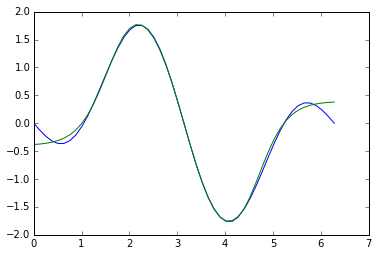

Sigmoid, num hidden = 5, num_epoch = 8000


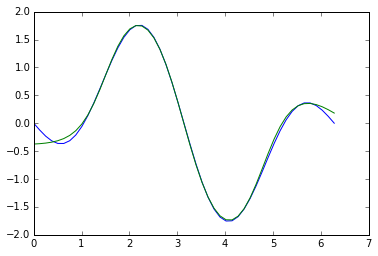

Sigmoid, num hidden = 5, num_epoch = 9000


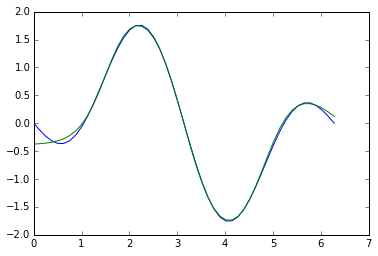

In [14]:
for i in range(1,10):
    #Requires use of an activation layer in order to avoid just being a straight line
    fc1  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 5)
    act = mx.sym.Activation(data = fc1, act_type = 'sigmoid')
    #Final layer must have num_hidden = shape of labels
    fc2  = mx.sym.FullyConnected(data=act, name='fc2', num_hidden = 1)
    lro = mx.sym.LinearRegressionOutput(data=fc2, label=Y, name="lro")
    #
    model = mx.mod.Module(
        symbol = lro ,
        data_names=['data'],
        label_names = ['lin_reg_label'])
    #
    model.fit(train_iter, eval_iter,
                optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
                num_epoch=1000 * i,
                batch_end_callback = mx.callback.Speedometer(batch_size, 2))
    print('Sigmoid, num hidden = 5, num_epoch = {}000'.format(i))
    plt.plot(x,y)
    plt.plot(x,model.predict(mx.io.NDArrayIter(x)).asnumpy())
    plt.show()

Sigmoid, num hidden = 5, num_epoch = 20000


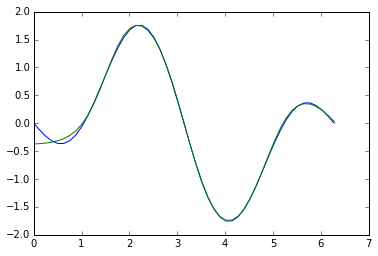

In [15]:
#Requires use of an activation layer in order to avoid just being a straight line
fc1  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 5)
act = mx.sym.Activation(data = fc1, act_type = 'sigmoid')
#Final layer must have num_hidden = shape of labels
fc2  = mx.sym.FullyConnected(data=act, name='fc2', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fc2, label=Y, name="lro")
#
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label'])
#
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=20000,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))
print('Sigmoid, num hidden = 5, num_epoch = 20000')
plt.plot(x,y)
plt.plot(x,model.predict(mx.io.NDArrayIter(x)).asnumpy())
plt.show()

In [16]:
#Requires use of an activation layer in order to avoid just being a straight line
fc1  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 10)
act = mx.sym.Activation(data = fc1, act_type = 'sigmoid')
#Final layer must have num_hidden = shape of labels
fc2  = mx.sym.FullyConnected(data=act, name='fc2', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fc2, label=Y, name="lro")
#
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label'])
#
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=20000,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))
print('Sigmoid, num hidden = 5, num_epoch = 20000')
ysig = model.predict(mx.io.NDArrayIter(x)).asnumpy()

Sigmoid, num hidden = 5, num_epoch = 20000


In [17]:
fc1  = mx.sym.FullyConnected(data=X, name='fc1', num_hidden = 10)
act = mx.sym.Activation(data = fc1, act_type = 'sigmoid')
#Final layer must have num_hidden = shape of labels
fc2  = mx.sym.FullyConnected(data=act, name='fc2', num_hidden = 1)
lro = mx.sym.LinearRegressionOutput(data=fc2, label=Y, name="tanh")
#
model = mx.mod.Module(
    symbol = lro ,
    data_names=['data'],
    label_names = ['lin_reg_label'])
#
model.fit(train_iter, eval_iter,
            optimizer_params={'learning_rate':0.005, 'momentum': 0.9},
            num_epoch=20000,
            batch_end_callback = mx.callback.Speedometer(batch_size, 2))
print('Sigmoid, num hidden = 5, num_epoch = 20000')
ytan = model.predict(mx.io.NDArrayIter(x)).asnumpy()

Sigmoid, num hidden = 5, num_epoch = 20000


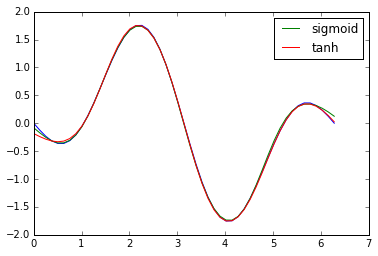

In [18]:
plt.plot(x,y)
plt.plot(x,ysig, label = 'sigmoid')
plt.plot(x,ytan, label = 'tanh')
plt.legend()
plt.show()

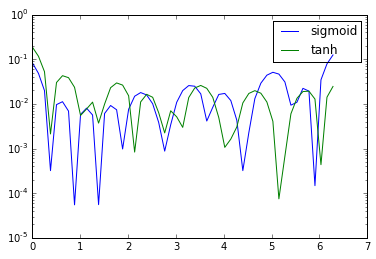

In [28]:
#Error
plt.semilogy(x,np.abs(np.transpose(ysig)[0]-y), label = 'sigmoid')
plt.semilogy(x,np.abs(np.transpose(ytan)[0]-y), label = 'tanh')
plt.legend()
plt.show()